In [1]:
# %config Completer.use_jedi = False

#___________________________________________________________________________________________________________________
get_ipython().magic('matplotlib notebook')
get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')

import matplotlib.pyplot as plt
import sys
import os
import time as time
import xarray as xr
from matplotlib.tri import Triangulation
import pandas as pa

sys.path.append("../src/")
from sub_mesh        import * 
from sub_plot        import * 
from sub_index       import * 

## > <u>Load mesh:</u> 

In [2]:
#___LOAD FESOM2 MESH___________________________________________________________________________________
meshpath='/work/ollie/projects/clidyn/FESOM2/meshes/core2/'
mesh=load_mesh_fesom2(meshpath, do_rot='None', focus=0, do_info=True, do_pickle=False, do_lsmask=False, do_augmpbnd=False)

 > load mesh from *.out files: /work/ollie/projects/clidyn/FESOM2/meshes/core2
___FESOM2 MESH INFO________________________
 > path            = /work/ollie/projects/clidyn/FESOM2/meshes/core2
 > id              = core2
 > do rot          = None
 > [al,be,ga]      = 50, 15, -90
 > do augmpbnd     = False
 > do cavity       = False
 > do lsmask       = False
 > do earea,eresol = False, False
 > do narea,nresol = False, False
___________________________________________
 > #node           = 126858
 > #elem           = 244659
 > #lvls           = 48
___________________________________________


## > <u>Compare different bottom topographies: </u>

<IPython.core.display.Javascript object>


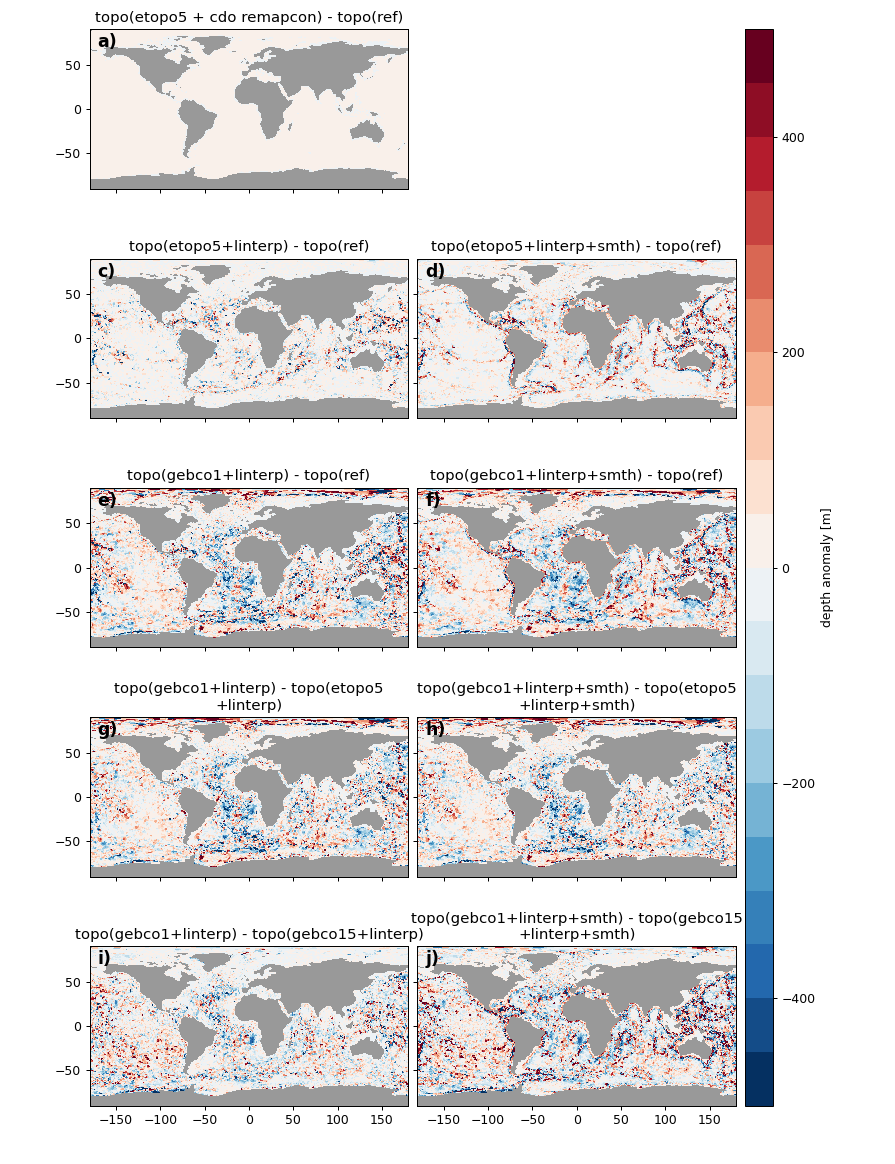

In [10]:
ndname1='/work/ollie/clidyn/FESOM2/meshes/core2/aux3d.out'
with open(ndname1) as f:
    nlev= int(next(f))
    zlev= np.array([next(f).rstrip() for x in range(nlev)]).astype(float)
    depth_ref       = np.array([next(f).rstrip() for x in range(mesh.n2dn)]).astype(float)
    depth_ref       = np.abs(depth_ref)
    
ndname2='/work/ollie/pscholz/bathmetry/cdo_interp_topo/depth_node_etopo.out'
with open(ndname2) as f:
    depth_etopocdo  = np.array([next(f).rstrip() for x in range(mesh.n2dn)]).astype(float)
    depth_etopocdo  = np.abs(depth_etopocdo)

ndname3='/work/ollie/pscholz/mesh_fesom2.0/core2_dep@node/depth@node_ETOPO5_orig.out'
with open(ndname3) as f:
    depth_etopoorig = np.array([next(f).rstrip() for x in range(mesh.n2dn)]).astype(float)
    depth_etopoorig = np.abs(depth_etopoorig)  

ndname4='/work/ollie/pscholz/mesh_fesom2.0/core2_dep@node/depth@node_ETOPO5_smth.out'
with open(ndname4) as f:
    depth_etoposmth = np.array([next(f).rstrip() for x in range(mesh.n2dn)]).astype(float)
    depth_etoposmth = np.abs(depth_etoposmth)  
    
ndname5='/work/ollie/pscholz/mesh_fesom2.0/core2_dep@node/depth@node_GEBCO1min_orig.out'
with open(ndname5) as f:
    depth_gebco1minorig = np.array([next(f).rstrip() for x in range(mesh.n2dn)]).astype(float)
    depth_gebco1minorig = np.abs(depth_gebco1minorig)  
    
ndname6='/work/ollie/pscholz/mesh_fesom2.0/core2_dep@node/depth@node_GEBCO1min_smth.out'
with open(ndname6) as f:
    depth_gebco1minsmth = np.array([next(f).rstrip() for x in range(mesh.n2dn)]).astype(float)
    depth_gebco1minsmth = np.abs(depth_gebco1minsmth)  
    
ndname7='/work/ollie/pscholz/mesh_fesom2.0/core2_dep@node/depth@node_GEBCO15sec_orig.out'
with open(ndname7) as f:
    depth_gebco15secorig = np.array([next(f).rstrip() for x in range(mesh.n2dn)]).astype(float)
    depth_gebco15secorig = np.abs(depth_gebco15secorig)  
    
ndname8='/work/ollie/pscholz/mesh_fesom2.0/core2_dep@node/depth@node_GEBCO15sec_smth.out'
with open(ndname8) as f:
    depth_gebco15secsmth = np.array([next(f).rstrip() for x in range(mesh.n2dn)]).astype(float)
    depth_gebco15secsmth = np.abs(depth_gebco15secsmth)  
        
depth_ref_cdo              = depth_etopocdo -depth_ref
depth_etopoorig_ref        = depth_etopoorig-depth_ref
depth_etoposmth_ref        = depth_etoposmth-depth_ref
depth_gebco1minorig_ref    = depth_gebco1minorig-depth_ref
depth_gebco1minsmth_ref    = depth_gebco1minsmth-depth_ref
depth_etopo_gebco1min_orig = depth_gebco1minorig-depth_etopoorig
depth_etopo_gebco1min_smth = depth_gebco1minsmth-depth_etoposmth
depth_gebco1min_15sec_orig = depth_gebco1minorig-depth_gebco15secorig
depth_gebco1min_15sec_smth = depth_gebco1minsmth-depth_gebco15secorig

#_____________________________________________________________________________________________
cmin, cmax = -500, 500
clevel = np.arange(cmin, cmax+1, 50)

#_____________________________________________________________________________________________
tri = Triangulation(mesh.n_x, mesh.n_y, mesh.e_i[mesh.e_pbnd_0,:])
fig, ax = plt.subplots(5, 2, figsize=[10,13], sharex=True, sharey=True)
fig.tight_layout()

hp2=ax[0,0].tripcolor(tri, depth_ref_cdo,              vmin=clevel[0], vmax=clevel[-1], cmap=plt.get_cmap('RdBu_r',clevel.size-1))
ax[0,0].set_title('topo(etopo5 + cdo remapcon) - topo(ref)')

hp2=ax[1,0].tripcolor(tri, depth_etopoorig_ref,        vmin=clevel[0], vmax=clevel[-1], cmap=plt.get_cmap('RdBu_r',clevel.size-1))
ax[1,0].set_title('topo(etopo5+linterp) - topo(ref)')
hp2=ax[1,1].tripcolor(tri, depth_etoposmth_ref,        vmin=clevel[0], vmax=clevel[-1], cmap=plt.get_cmap('RdBu_r',clevel.size-1))
ax[1,1].set_title('topo(etopo5+linterp+smth) - topo(ref)')

hp2=ax[2,0].tripcolor(tri, depth_gebco1minorig_ref,    vmin=clevel[0], vmax=clevel[-1], cmap=plt.get_cmap('RdBu_r',clevel.size-1))
ax[2,0].set_title('topo(gebco1+linterp) - topo(ref)')
hp2=ax[2,1].tripcolor(tri, depth_gebco1minsmth_ref,    vmin=clevel[0], vmax=clevel[-1], cmap=plt.get_cmap('RdBu_r',clevel.size-1))
ax[2,1].set_title('topo(gebco1+linterp+smth) - topo(ref)')

hp2=ax[3,0].tripcolor(tri, depth_etopo_gebco1min_orig, vmin=clevel[0], vmax=clevel[-1], cmap=plt.get_cmap('RdBu_r',clevel.size-1))
ax[3,0].set_title('topo(gebco1+linterp) - topo(etopo5\n+linterp)')
hp2=ax[3,1].tripcolor(tri, depth_etopo_gebco1min_orig, vmin=clevel[0], vmax=clevel[-1], cmap=plt.get_cmap('RdBu_r',clevel.size-1))
ax[3,1].set_title('topo(gebco1+linterp+smth) - topo(etopo5\n+linterp+smth)')

hp2=ax[4,0].tripcolor(tri, depth_gebco1min_15sec_orig, vmin=clevel[0], vmax=clevel[-1], cmap=plt.get_cmap('RdBu_r',clevel.size-1))
ax[4,0].set_title('topo(gebco1+linterp) - topo(gebco15+linterp)')
hp2=ax[4,1].tripcolor(tri, depth_gebco1min_15sec_smth, vmin=clevel[0], vmax=clevel[-1], cmap=plt.get_cmap('RdBu_r',clevel.size-1))
ax[4,1].set_title('topo(gebco1+linterp+smth) - topo(gebco15\n+linterp+smth)')

#_____________________________________________________________________________________________
xlim = [-180, 180]
ylim = [ -90,  90]
str_enum='abcdefghijklmnopqrstuvxyz'
cnt = 0
for axi in ax.flatten():
    axi.set_facecolor([0.6 ,0.6,0.6])
    axi.set_xlim(-180,180)
    axi.set_ylim(-90,90)
    axi.set_aspect('equal')
    txtx, txty = xlim[0]+(xlim[1]-xlim[0])*0.025, ylim[1]-(ylim[1]-ylim[0])*0.025
    axi.text(txtx,txty,'{})'.format(str_enum[cnt]) , fontsize=14, fontweight='bold',horizontalalignment='left',verticalalignment='top')
    cnt=cnt+1
    
#_____________________________________________________________________________________________
cbar2 = plt.colorbar(hp2, ax=ax , label='depth anomaly [m]')

#_____________________________________________________________________________________________
ax  = ax.flatten()
nax = len(ax)
ax_pos = np.zeros((nax,4))
for jj in range(0,nax):
    aux = ax[jj].get_position()
    ax_pos[jj,:] = np.array([aux.x0, aux.y0, aux.width, aux.height])

x0, y0, x1, y1 = 0.1, 0.05, 0.9, 0.9
w,  h  = ax_pos[:,2].min(), ax_pos[:,3].min()
wg, hg = 0.01, 0.06

ax[0].set_position( [x0+(w+wg)*0, y0+(h+hg)*4, w, h] )
ax[1].set_position( [x0+(w+wg)*1, y0+(h+hg)*4, w, h] )
ax[2].set_position( [x0+(w+wg)*0, y0+(h+hg)*3, w, h] )
ax[3].set_position( [x0+(w+wg)*1, y0+(h+hg)*3, w, h] )
ax[4].set_position( [x0+(w+wg)*0, y0+(h+hg)*2, w, h] )
ax[5].set_position( [x0+(w+wg)*1, y0+(h+hg)*2, w, h] )
ax[6].set_position( [x0+(w+wg)*0, y0+(h+hg)*1, w, h] )
ax[7].set_position( [x0+(w+wg)*1, y0+(h+hg)*1, w, h] )
ax[8].set_position( [x0+(w+wg)*0, y0+(h+hg)*0, w, h] )
ax[9].set_position( [x0+(w+wg)*1, y0+(h+hg)*0, w, h] )

cbar2_pos = cbar2.ax.get_position()
cbar2.ax.set_position([x0+(w+wg)*2, y0, cbar2_pos.width*0.5, h*5+4*hg])
cbar2.ax.set_aspect('auto')

ax[1].remove()

#_____________________________________________________________________________________________
do_save = None #'/home/ollie/pscholz/figures/test_dep@elem/topo_compare_ref_etopo5_gebco1_gebco15@node.png'
do_savefigure(do_save, dpi=300, transparent=False, facecolor=None)

plt.show(block=False)